<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Image-with-rocks/no-sand" data-toc-modified-id="Image-with-rocks/no-sand-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image with rocks/no sand</a></span><ul class="toc-item"><li><span><a href="#Getting-the-image" data-toc-modified-id="Getting-the-image-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Getting the image</a></span></li><li><span><a href="#Extracting-the-indexes-of-rocks" data-toc-modified-id="Extracting-the-indexes-of-rocks-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Extracting the indexes of rocks</a></span></li></ul></li></ul></div>

# Load the libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import skimage.morphology as morph

# Image with rocks/no sand

Take all the pixels belonging to sand and assign black color [0,0,0] to it. What we get as a result is ann image with only rocks 

## Getting the image

threshold value 147


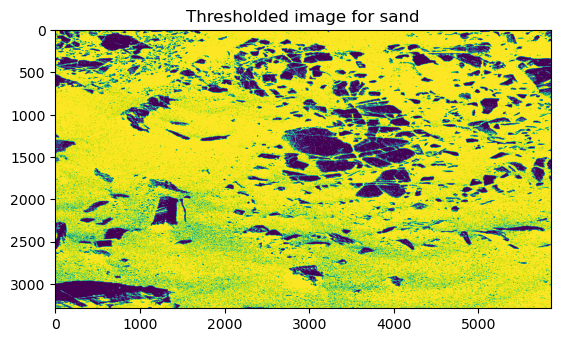

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [2]:
image = cv2.imread("images/cv_test_images_1.png")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

from skimage.filters import threshold_otsu

threshold = threshold_otsu(img)
print("threshold value",threshold)
#Generate thresholded image
thresholded_img = img < threshold
plt.imshow(thresholded_img)
plt.title("Thresholded image for sand")
plt.show()
print(thresholded_img)


Text(0.5, 1.0, 'Image with rocks')

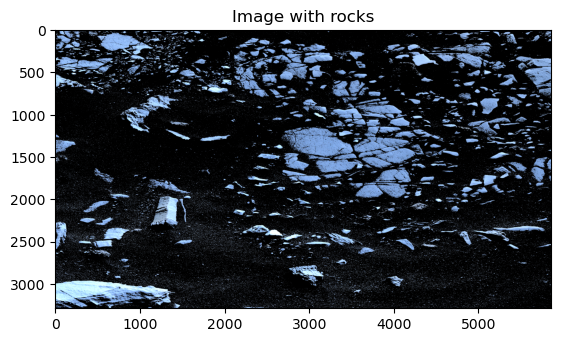

In [3]:
processed_image = image.copy()
for i in range(thresholded_img.shape[0]):
    for j in range(thresholded_img.shape[1]):
        if thresholded_img[i][j] == True:
            processed_image[i][j] = [0, 0, 0]
plt.imshow(processed_image)
plt.title("Image with rocks")


## Extracting the indexes of rocks

extracted the position row and col of the pixels of rocks and stored it in a list

In [4]:
rock_indexes = []
for i in range(thresholded_img.shape[0]):
    for j in range(thresholded_img.shape[1]):
        if thresholded_img[i][j] == False:
            rock_indexes.append((i,j))
            
print(rock_indexes[0:5])
print(len(rock_indexes))

[(0, 13), (0, 14), (0, 15), (0, 16), (0, 17)]
3994759


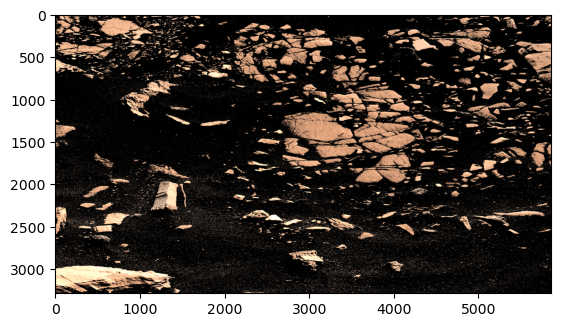

In [5]:
image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

pixels = np.array(image)

plt.imshow(pixels)
plt.show()

In [6]:
# plt.hist(image.flat, bins=100, range=(0,255));

In [7]:
(h,w,c) = image.shape
image=image.reshape((h*w,c))

In [8]:
kmeans=KMeans(n_clusters=3)
s=kmeans.fit_predict(image)

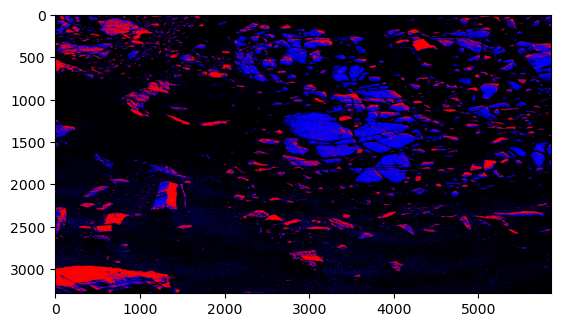

In [9]:
hh=np.array([[ 0,0  , 0],
 [0, 0 ,255],
 [255, 0,0]])
rgb_cols = hh.round(0).astype(int)
img_quant = np.reshape(rgb_cols[s],(h,w,c))
plt.imshow(img_quant)

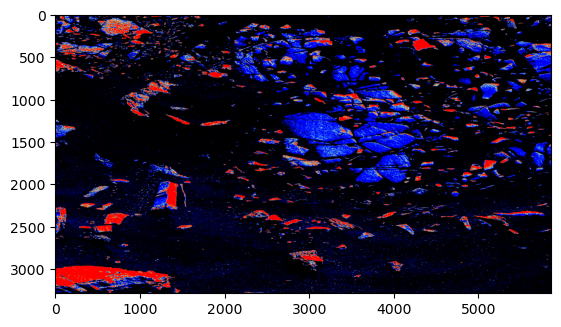

In [14]:
# img_closed=morph.dilation(img_quant)
# img_closed=morph.erosion(img_closed)
# plt.imshow(img_closed)